In [40]:
import util
import numpy as np
from scipy.stats import multivariate_normal as mvn

In [13]:
gaussians = []

In [14]:
def fit(X, Y):
  # assume classes are numbered 0...K-1
  K = len(set(Y))

  #gaussians = []
  p_y = np.zeros(K)
  for k in range(K):
    Xk = X[Y == k]
    p_y[k] = len(Xk)
    mean = Xk.mean(axis=0)
    cov = np.cov(Xk.T)
    g = {'m': mean, 'c': cov}
    gaussians.append(g)
  # normalize p(y)
  p_y /= p_y.sum()

In [3]:
X, Y = util.get_mnist()

Reading in and transforming data...


In [15]:
fit(X, Y)

In [16]:
K = len(set(Y))

In [17]:
K

10

In [35]:
gaussians[:1][0]['m'].shape

(784,)

In [37]:
gaussians[:1][0]['c'].shape

(784, 784)

In [38]:
def sample_given_y(y):
  g = gaussians[y]
  return mvn.rvs(mean=g['m'], cov=g['c'])

In [ ]:
import matplotlib.pyplot as plt

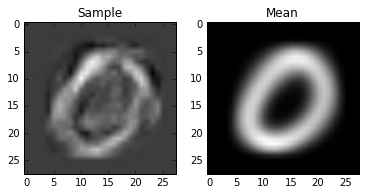

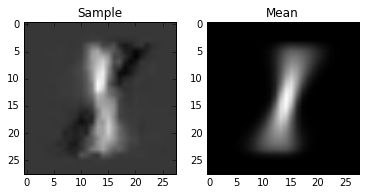

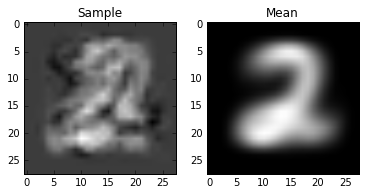

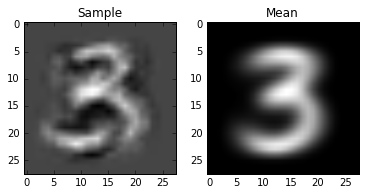

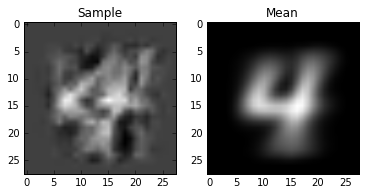

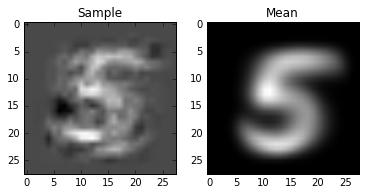

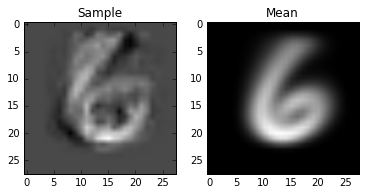

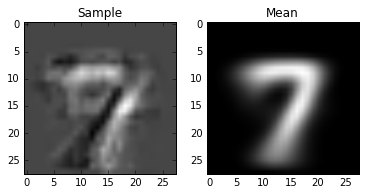

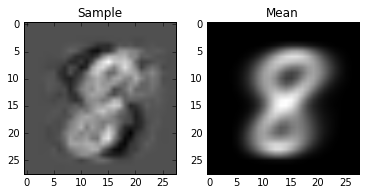

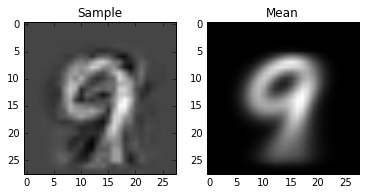

In [49]:
for k in range(K):
    sample = sample_given_y(k).reshape(28, 28)
    mean = gaussians[k]['m'].reshape(28, 28)

    plt.subplot(1,2,1)
    plt.imshow(sample, cmap='gray')
    plt.title("Sample")
    plt.subplot(1,2,2)
    plt.imshow(mean, cmap='gray')
    plt.title("Mean")
    plt.show()

In [56]:
sample = sample_given_y(k).reshape(28, 28)

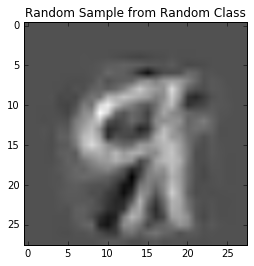

In [57]:
plt.imshow(sample, cmap='gray')
plt.title("Random Sample from Random Class")
plt.show()